In [1]:
# import libraries
import csv
import time
import pandas as pd
import os
import sys
import numpy as np
import io
from google.colab import files
import gensim
import nltk
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
df = pd.read_csv('/content/drive/My Drive/dataset_merged_mh_journalling.csv', index_col=0)

In [ ]:
df.head()

,title,selftext,class
7,Suicidal Partner,My boyfriend has been depressed and suicidal s...,Suicide
10,Why does there always have to be a reason to f...,when im honest with my dad if im anxious depre...,Suicide
17,my friend's attempted and i dont know how to r...,"hi, i just got a suicidal note/message from a ...",Suicide
20,Im scared of myself,I literally think about it hourly. Im so hideo...,Suicide
22,I dont want to die,But I dont really see a way out of this I have...,Suicide


In [5]:
df['text'] = df['title'] + ' ' + df['selftext']
df.drop(columns=['title' , 'selftext'], inplace=True)


In [6]:
df['text'] = df['text'].str.lower()


In [7]:
df['text'] = df['text'].str.replace('https:\S+|www.\S+', '', case=False)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [8]:
df['text'] = df['text'].str.replace(r'[^\x00-\x7F]+', '', regex=True)


In [9]:
df = df.dropna()

In [10]:
df['token_text'] = df['text'].apply(nltk.word_tokenize)


In [11]:
stop_words = nltk.corpus.stopwords.words("english")
df['token_text'] = df['token_text'].apply(lambda x: [item for item in x if item not in stop_words] )


In [12]:
# remove punctuation, non-letter characters
df['token_text'] = df['token_text'].apply(lambda x: [item for item in x if re.match('[a-z]+', item)] )


In [13]:
df = df.dropna()

In [ ]:
df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 612339 entries, 7 to 68971
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   class       612339 non-null  object
 1   text        612339 non-null  object
 2   token_text  612339 non-null  object
dtypes: object(3)
memory usage: 18.7+ MB


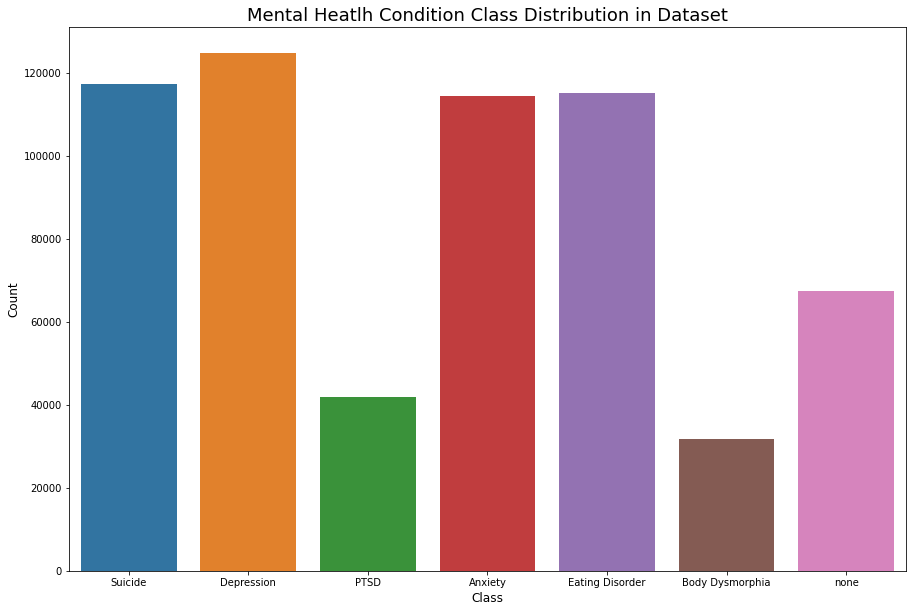

In [ ]:
# class distribution
plt.figure(figsize = (15,10))
ax = sns.countplot(x='class',data=df)
plt.title("Mental Heatlh Condition Class Distribution in Dataset", size = 18)
plt.xlabel("Class", size = 12)
plt.ylabel("Count", size = 12)
plt.show()

In [ ]:
df['class'].value_counts()

Depression         124738
Suicide            117211
Eating Disorder    115080
Anxiety            114446
none                67424
PTSD                41797
Body Dysmorphia     31643
Name: class, dtype: int64

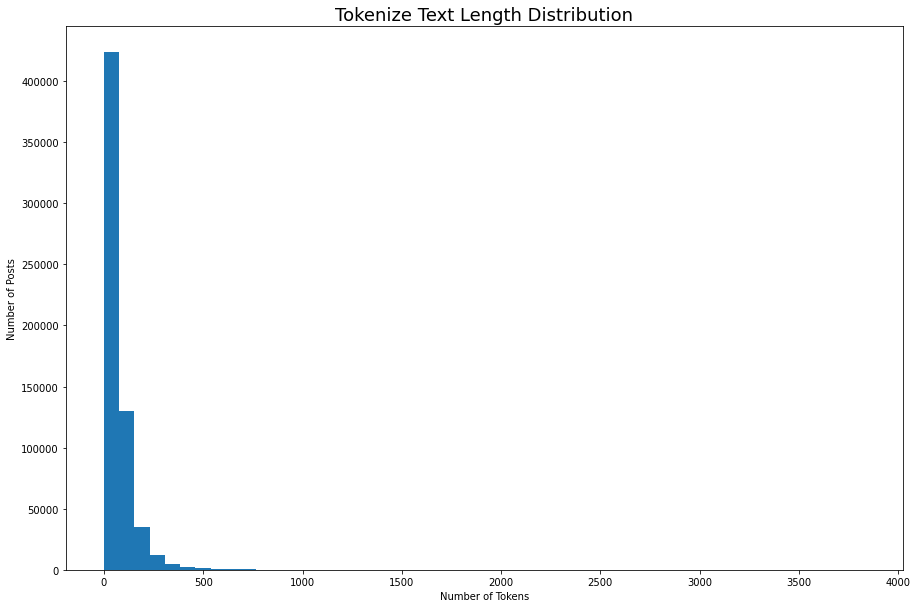

In [ ]:
# post tokenized text lengths
length = [len(text) for text in df['token_text']]

plt.figure(figsize = (15,10))
plt.hist(length, bins=50)
plt.title("Tokenize Text Length Distribution", size = 18)
plt.xlabel("Number of Tokens")
plt.ylabel("Number of Posts")
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, svm
from sklearn.metrics import accuracy_score
import sklearn.metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics                 import accuracy_score, recall_score, roc_auc_score, matthews_corrcoef

In [15]:
X = df['token_text'].astype(str)
Y = df['class'].astype(str)

In [16]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,Y,random_state = 42, test_size=0.2, stratify=Y)

In [17]:
classes_names = [
                 'Suicide',
                 'Depression',
                 'PTSD',
                 'Anxiety',
                 'Eating Disorder',
                 'Body Dysmorphia'                 
]

In [18]:
encoder = LabelEncoder()
encoder.fit(classes_names)
y_train_enc = encoder.fit_transform(y_train)
y_test_enc = encoder.transform(y_test)
print(encoder.classes_)
integer_mapping = {l: i for i, l in enumerate(encoder.classes_)}
print(integer_mapping)

['Anxiety' 'Body Dysmorphia' 'Depression' 'Eating Disorder' 'PTSD'
 'Suicide' 'none']
{'Anxiety': 0, 'Body Dysmorphia': 1, 'Depression': 2, 'Eating Disorder': 3, 'PTSD': 4, 'Suicide': 5, 'none': 6}


In [ ]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(X)
Train_X_trans = Tfidf_vect.transform(X_train)
Test_X_trans = Tfidf_vect.transform(X_test)

In [ ]:
vocab_dict = Tfidf_vect.vocabulary_
x = sorted(vocab_dict.items(), key=lambda x: x[1], reverse=True)
x

[('zoom', 4999),
 ('zone', 4998),
 ('zombie', 4997),
 ('zoloft', 4996),
 ('zero', 4995),
 ('ysk', 4994),
 ('yrs', 4993),
 ('yr', 4992),
 ('youve', 4991),
 ('youtube', 4990),
 ('youth', 4989),
 ('youre', 4988),
 ('youngest', 4987),
 ('younger', 4986),
 ('young', 4985),
 ('youll', 4984),
 ('youd', 4983),
 ('you', 4982),
 ('yogurt', 4981),
 ('yoga', 4980),
 ('yo', 4979),
 ('yet', 4978),
 ('yesterday', 4977),
 ('yes', 4976),
 ('yells', 4975),
 ('yellow', 4974),
 ('yelling', 4973),
 ('yelled', 4972),
 ('yell', 4971),
 ('years', 4970),
 ('year', 4969),
 ('yeah', 4968),
 ('yea', 4967),
 ('yay', 4966),
 ('yall', 4965),
 ('ya', 4964),
 ('xanax', 4963),
 ('x200b', 4962),
 ('wtf', 4961),
 ('wrote', 4960),
 ('wrong', 4959),
 ('written', 4958),
 ('writing', 4957),
 ('write', 4956),
 ('wrists', 4955),
 ('wrist', 4954),
 ('wreck', 4953),
 ('wrapped', 4952),
 ('wrap', 4951),
 ('wow', 4950),
 ('wounds', 4949),
 ('wound', 4948),
 ('wouldve', 4947),
 ('wouldnt', 4946),
 ('would', 4945),
 ('worthy', 4944)

In [ ]:
labels = ['Anxiety', 'Body Dysmorphia', 'Depression', 'Eating Disorder', 'PTSD' ,'Suicide' ,'none']


svm_model = svm.LinearSVC(random_state=42)
svm_model.fit(Train_X_trans,y_train_enc)
preds_SVM = svm_model.predict(Test_X_trans)
print(svm_model.score(Test_X_trans,y_test_enc))
print(svm_model.get_params())
print("SVM Accuracy Score", accuracy_score(y_test_enc, preds_SVM))
print("Confusion matrix:\n",sklearn.metrics.confusion_matrix(y_test_enc, preds_SVM))
print("F1:",sklearn.metrics.f1_score(y_test_enc, preds_SVM,average='weighted'))
print("Precision:", sklearn.metrics.precision_score(y_test_enc, preds_SVM,average='weighted'))
print("Recall:", sklearn.metrics.recall_score(y_test_enc, preds_SVM,average='weighted'))
print("Classification Report:\n",sklearn.metrics.classification_report(y_test_enc, preds_SVM, target_names=labels))

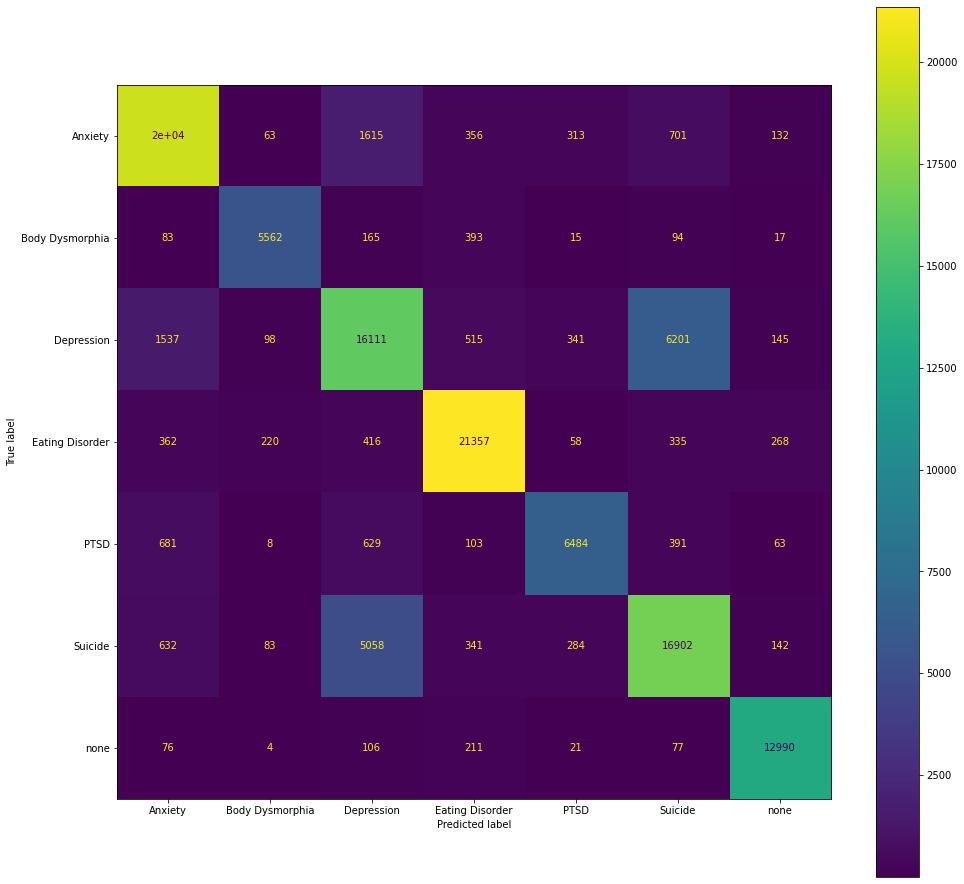

In [ ]:
fig, ax = plt.subplots(figsize=(16, 16))
x=sklearn.metrics.ConfusionMatrixDisplay(sklearn.metrics.confusion_matrix(y_test_enc, preds_SVM),display_labels=labels)
x.plot(ax=ax)
plt.show()

In [19]:
import gensim
import keras
from gensim.models import Word2Vec
from tensorflow.keras import utils as np_utils
from tensorflow.keras import preprocessing
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import models, layers

In [20]:
X = df['token_text']
Y = df['class']


In [21]:
word_embeddings_model = Word2Vec(X,window=5,size=300)

In [22]:
max_seq_len = max([len(s) for s in X])
print(max_seq_len)

3835


In [23]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,Y,random_state = 42, test_size=0.2, stratify=Y)

In [24]:
token = Tokenizer()
token.fit_on_texts(X)
X_train = token.texts_to_sequences(X_train)
X_train = pad_sequences(X_train, max_seq_len)
X_test = token.texts_to_sequences(X_test)
X_test = pad_sequences(X_test, max_seq_len)

In [25]:
classes_names = ['Anxiety', 'Body Dysmorphia', 'Depression', 'Eating Disorder', 'PTSD' ,'Suicide' ,'none']

In [26]:
encoder = LabelEncoder()
encoder.fit(classes_names)
Y_test = encoder.fit_transform(y_test)
Y_test = np_utils.to_categorical(np.asarray(Y_test))
Y_train = encoder.fit_transform(y_train)
Y_train = np_utils.to_categorical(np.asarray(Y_train))


In [27]:
EMBED_DIM = 300
VOCAB_SIZE = len(token.word_index)+1

In [28]:
# create embedding matrix (https://blog.keras.io/using-pre-trained-word-embeddings-in-a-keras-model.html)
word_index = token.word_index
embedding_matrix = np.zeros(shape=(VOCAB_SIZE,EMBED_DIM))
for word, i in word_index.items():
  try:
    embedding_vector = word_embeddings_model[word]
      # words not found in embedding index will be all-zeros.
    embedding_matrix[i] = embedding_vector
  except:
    pass

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [29]:
from keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor='loss', patience=1)

Gkotsis et al architecture

In [ ]:
CNN_model = models.Sequential() #remove max input length seq parameter?
CNN_model.add(layers.Embedding(VOCAB_SIZE,EMBED_DIM,weights=[embedding_matrix],input_length=max_seq_len, trainable=False))
CNN_model.add(layers.Conv1D(5,3,activation='relu'))
CNN_model.add(layers.MaxPooling1D(2))
CNN_model.add(layers.Flatten())
CNN_model.add(layers.Dropout(0.25))
CNN_model.add(layers.Dense(256,activation='relu'))
CNN_model.add(layers.Dense(7, activation='sigmoid'))

CNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3833, 300)         88088400  
                                                                 
 conv1d (Conv1D)             (None, 3831, 5)           4505      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1915, 5)          0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 9575)              0         
                                                                 
 dropout (Dropout)           (None, 9575)              0         
                                                                 
 dense (Dense)               (None, 256)               2451456   
                                                        

In [ ]:
CNN_model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

In [ ]:
CNN_model.fit(X_train,Y_train, epochs=100,batch_size=64, validation_data=(X_test,Y_test),callbacks=callback)

Epoch 1/100
7655/7655 [==============================] - 107s 14ms/step - loss: 0.7132 - accuracy: 0.7195 - val_loss: 0.6222 - val_accuracy: 0.7588
Epoch 2/100
7655/7655 [==============================] - 106s 14ms/step - loss: 0.6496 - accuracy: 0.7485 - val_loss: 0.6225 - val_accuracy: 0.7576
Epoch 3/100
7655/7655 [==============================] - 106s 14ms/step - loss: 0.6360 - accuracy: 0.7539 - val_loss: 0.6136 - val_accuracy: 0.7645
Epoch 4/100
7655/7655 [==============================] - 106s 14ms/step - loss: 0.6259 - accuracy: 0.7573 - val_loss: 0.6158 - val_accuracy: 0.7572
Epoch 5/100
7655/7655 [==============================] - 108s 14ms/step - loss: 0.6206 - accuracy: 0.7599 - val_loss: 0.6101 - val_accuracy: 0.7677
Epoch 6/100
7655/7655 [==============================] - 106s 14ms/step - loss: 0.6168 - accuracy: 0.7614 - val_loss: 0.6103 - val_accuracy: 0.7666
Epoch 7/100
7655/7655 [==============================] - 106s 14ms/step - loss: 0.6138 - accuracy: 0.7636 - val_

In [ ]:
CNN_preds3 = CNN_model.predict(X_test, batch_size=64)
print(sklearn.metrics.classification_report(Y_test.argmax(axis=1),CNN_preds3.argmax(axis=1), target_names=encoder.classes_))
print("Confusion matrix:\n",sklearn.metrics.confusion_matrix(Y_test.argmax(axis=1),CNN_preds3.argmax(axis=1)))

                 precision    recall  f1-score   support

        Anxiety       0.86      0.78      0.81     22889
Body Dysmorphia       0.80      0.87      0.83      6329
     Depression       0.61      0.56      0.58     24948
Eating Disorder       0.91      0.88      0.90     23016
           PTSD       0.84      0.68      0.75      8359
        Suicide       0.60      0.77      0.67     23442
           none       0.96      0.91      0.93     13485

       accuracy                           0.76    122468
      macro avg       0.80      0.78      0.78    122468
   weighted avg       0.77      0.76      0.77    122468

Confusion matrix:
 [[17782   187  2919   475   544   903    79]
 [   70  5508   136   365    25   218     7]
 [  999   185 13868   472   268  9087    69]
 [  408   712   509 20264    31   814   278]
 [  801   136   621   103  5693   965    40]
 [  277   131  4482   202   180 18100    70]
 [  460    13   135   316    24   287 12250]]


In [ ]:
labels = ['Anxiety', 'Body Dysmorphia', 'Depression', 'Eating Disorder', 'PTSD' ,'Suicide' ,'none']

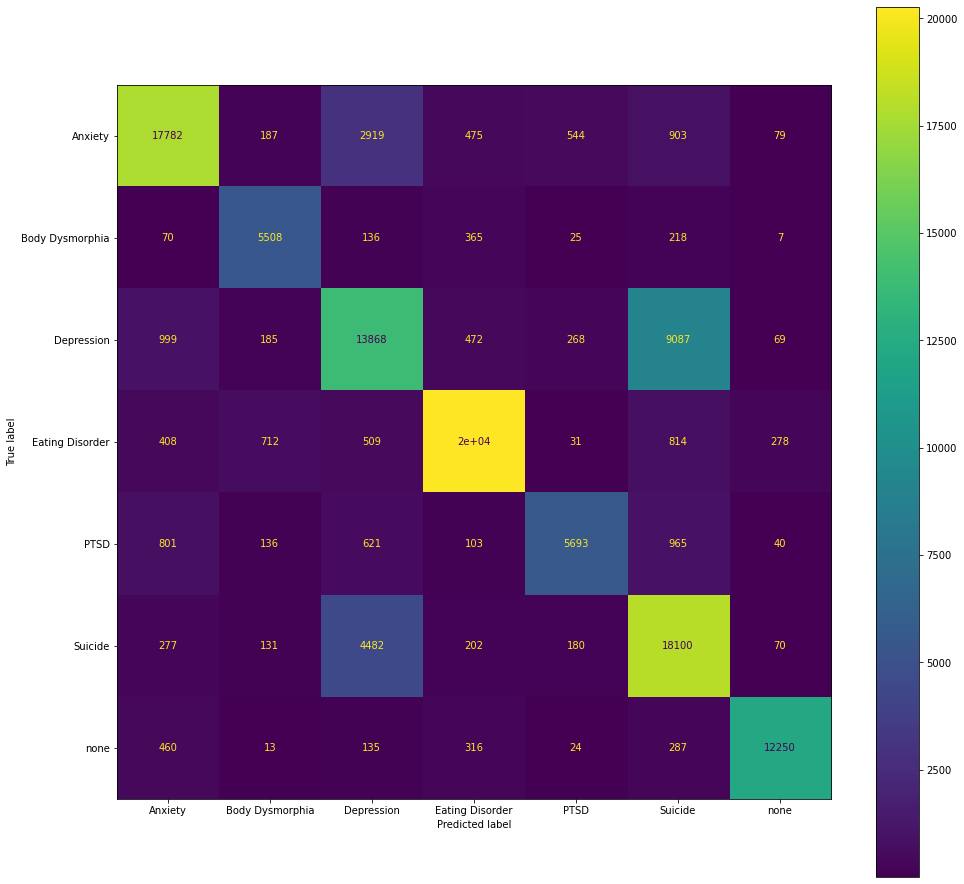

In [ ]:
fig, ax = plt.subplots(figsize=(16, 16))
x=sklearn.metrics.ConfusionMatrixDisplay(sklearn.metrics.confusion_matrix(Y_test.argmax(axis=1),CNN_preds3.argmax(axis=1)),display_labels=classes_names)
x.plot(ax=ax)
plt.show()

In [ ]:
print("Accuracy Score", accuracy_score(Y_test.argmax(axis=1),CNN_preds3.argmax(axis=1)))
print("F1:",sklearn.metrics.f1_score(Y_test.argmax(axis=1),CNN_preds3.argmax(axis=1),average='weighted'))
print("Precision:", sklearn.metrics.precision_score(Y_test.argmax(axis=1),CNN_preds3.argmax(axis=1),average='weighted'))
print("Recall:", sklearn.metrics.recall_score(Y_test.argmax(axis=1),CNN_preds3.argmax(axis=1),average='weighted'))

Accuracy Score 0.7631789528693209
F1: 0.76519274295414
Precision: 0.7743486602129405
Recall: 0.7631789528693209


In [ ]:
word_embeddings_model.save("word2vec_mh.model")

In [ ]:
CNN_model.save("mh_CNN_Gkotsis")

INFO:tensorflow:Assets written to: mh_CNN_Gkotsis/assets


In [ ]:
!zip -r /content/mh_CNN_Gkotsis.zip /content/mh_CNN_Gkotsis

  adding: content/mh_CNN_Gkotsis/ (stored 0%)
  adding: content/mh_CNN_Gkotsis/variables/ (stored 0%)
  adding: content/mh_CNN_Gkotsis/variables/variables.data-00000-of-00001 (deflated 78%)
  adding: content/mh_CNN_Gkotsis/variables/variables.index (deflated 61%)
  adding: content/mh_CNN_Gkotsis/saved_model.pb (deflated 87%)
  adding: content/mh_CNN_Gkotsis/assets/ (stored 0%)
  adding: content/mh_CNN_Gkotsis/keras_metadata.pb (deflated 88%)


In [ ]:
from google.colab import files
files.download("/content/mh_CNN_Gkotsis.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

LTSM Model 

In [30]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, LSTM


In [31]:
model = models.Sequential()
model.add(layers.Embedding(VOCAB_SIZE,EMBED_DIM,weights=[embedding_matrix],input_length=max_seq_len, trainable=False))
model.add(LSTM(EMBED_DIM))
model.add(Dropout(0.3))
model.add(Dense(7))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3835, 300)         83627700  
                                                                 
 lstm (LSTM)                 (None, 300)               721200    
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense (Dense)               (None, 7)                 2107      
                                                                 
 activation (Activation)     (None, 7)                 0         
                                                                 
Total params: 84,351,007
Trainable params: 723,307
Non-trainable params: 83,627,700
_________________________________________________________________


In [32]:
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

In [33]:
model.fit(X_train,Y_train, epochs=3,batch_size=64, validation_data=(X_test,Y_test),callbacks=callback)

Epoch 1/3
7655/7655 [==============================] - 4241s 553ms/step - loss: 0.5449 - accuracy: 0.7931 - val_loss: 0.4717 - val_accuracy: 0.8181
Epoch 2/3
7655/7655 [==============================] - 4282s 559ms/step - loss: 0.4681 - accuracy: 0.8196 - val_loss: 0.4607 - val_accuracy: 0.8222
Epoch 3/3
7655/7655 [==============================] - 4294s 561ms/step - loss: 0.4428 - accuracy: 0.8281 - val_loss: 0.4542 - val_accuracy: 0.8243


In [34]:
model_pred = model.predict(X_test, batch_size=64)
print(sklearn.metrics.classification_report(Y_test.argmax(axis=1),model_pred.argmax(axis=1), target_names=encoder.classes_))
print("Confusion matrix:\n",sklearn.metrics.confusion_matrix(Y_test.argmax(axis=1),model_pred.argmax(axis=1)))

                 precision    recall  f1-score   support

        Anxiety       0.90      0.85      0.87     22889
Body Dysmorphia       0.91      0.90      0.90      6329
     Depression       0.67      0.67      0.67     24948
Eating Disorder       0.94      0.94      0.94     23016
           PTSD       0.87      0.80      0.83      8359
        Suicide       0.70      0.76      0.73     23442
           none       0.96      0.98      0.97     13485

       accuracy                           0.82    122468
      macro avg       0.85      0.84      0.84    122468
   weighted avg       0.83      0.82      0.83    122468

Confusion matrix:
 [[19383    73  2091   301   382   558   101]
 [   61  5696   168   308     6    79    11]
 [ 1031   125 16666   382   321  6335    88]
 [  209   275   412 21621    56   243   200]
 [  538     8   715    70  6689   303    36]
 [  307    87  4793   217   219 17742    77]
 [   42     3    75   138    12    63 13152]]


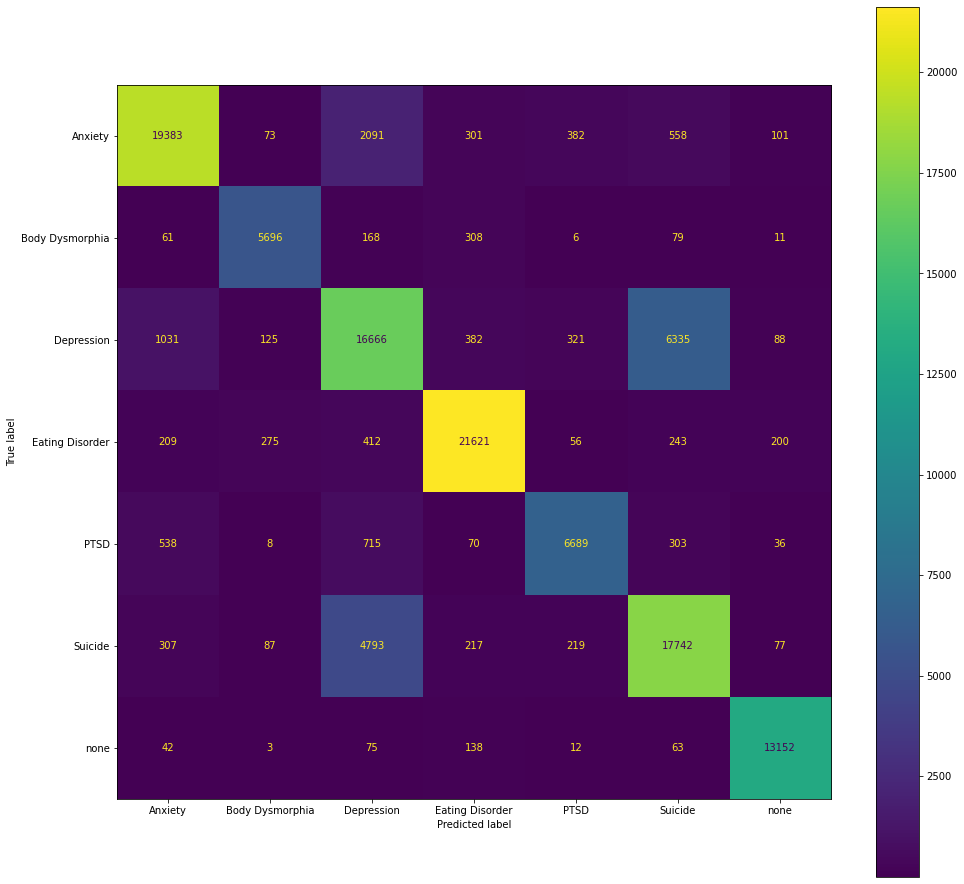

In [35]:
fig, ax = plt.subplots(figsize=(16, 16))
x=sklearn.metrics.ConfusionMatrixDisplay(sklearn.metrics.confusion_matrix(Y_test.argmax(axis=1),model_pred.argmax(axis=1)),display_labels=classes_names)
x.plot(ax=ax)
plt.show()

In [36]:
model.save("mh_LSTM_5")

INFO:tensorflow:Assets written to: mh_LSTM_5/assets


INFO:tensorflow:Assets written to: mh_LSTM_5/assets


In [37]:
from google.colab import files
!zip -r /content/mh_LSTM_5.zip /content/mh_LSTM_5
files.download("/content/mh_LSTM_5.zip")

  adding: content/mh_LSTM_5/ (stored 0%)
  adding: content/mh_LSTM_5/saved_model.pb (deflated 90%)
  adding: content/mh_LSTM_5/assets/ (stored 0%)
  adding: content/mh_LSTM_5/variables/ (stored 0%)
  adding: content/mh_LSTM_5/variables/variables.data-00000-of-00001 (deflated 79%)
  adding: content/mh_LSTM_5/variables/variables.index (deflated 60%)
  adding: content/mh_LSTM_5/keras_metadata.pb (deflated 87%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [48]:
dataset = pd.read_csv('/content/drive/My Drive/dataset_journal_entries.csv', index_col=0)

In [40]:
df['text'] = df['title'] + ' ' + df['selftext']
df.drop(columns=['title', 'selftext'], inplace=True)
df['text'] = df['text'].str.lower()
df['text'] = df['text'].str.replace('https:\S+|www.\S+', '', case=False)
df['text'] = df['text'].str.replace(r'[^\x00-\x7F]+', '', regex=True)
df = df.dropna()
df['token_text'] = df['text'].apply(nltk.word_tokenize)
stop_words = nltk.corpus.stopwords.words("english")
df['token_text'] = df['token_text'].apply(lambda x: [item for item in x if item not in stop_words])
df['token_text'] = df['token_text'].apply(lambda x: [item for item in x if re.match('[a-z]+', item)])
df = df.dropna()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


In [44]:
df.head()

,subreddit,text,token_text
0,Diary,gut punch after gut punch. i feel more and mor...,"[gut, punch, gut, punch, feel, weak, day, day,..."
1,Diary,i want to do more i really want to do more. pu...,"[want, really, want, push, expand, capable, re..."
2,Diary,romance vent/ self talk do i like him? sometim...,"[romance, vent/, self, talk, like, sometimes, ..."
4,Diary,to you to whoever cosmic being that decided to...,"[whoever, cosmic, decided, give, character, de..."
5,Diary,"sigh life is shit, having no crush is boring. ...","[sigh, life, shit, crush, boring, happy, fucki..."


In [42]:
max_seq_len = max([len(s) for s in df['token_text']])
print(max_seq_len)

3624


In [45]:
X_train = token.texts_to_sequences(df['token_text'])
X_train = pad_sequences(X_train, 3835)

In [47]:
model_pred = model.predict(X_train, batch_size=64)

In [49]:
for i in range(0, 50):
    print(dataset.iloc[i],df.iloc[i], model_pred[i])
    print('\n')

title                               Gut punch after gut punch.
selftext     I feel more and more weak day by day. I feel a...
subreddit                                                Diary
Name: 0, dtype: object subreddit                                                 Diary
text          gut punch after gut punch. i feel more and mor...
token_text    [gut, punch, gut, punch, feel, weak, day, day,...
Name: 0, dtype: object [0.89798677 0.10392782 0.8320624  0.26048282 0.32691696 0.8376754
 0.04085764]


title                                        I want to do more
selftext     I really want to do more. Push myself until I ...
subreddit                                                Diary
Name: 1, dtype: object subreddit                                                 Diary
text          i want to do more i really want to do more. pu...
token_text    [want, really, want, push, expand, capable, re...
Name: 1, dtype: object [0.4906076  0.01597843 0.9472448  0.36618868 0.24614172 0.9005893